In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import img_to_array

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
print(tf.__version__)

2.17.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
shape = (1025, 97,1)
batchSize = 16

# ImageDataGenerator for data augmentation
imageGenerator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,    # 20% validation split
    rotation_range=10,       # Slight rotation
    width_shift_range=0.05,  # Small horizontal shift
    height_shift_range=0.05, # Small vertical shift
    zoom_range=0.1,          # Slight zoom in/out
    fill_mode="nearest"      # Fill with nearest pixels
)

# Training and validation datasets
train_dataset = imageGenerator.flow_from_directory(
    directory="/content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/New/",
    batch_size=batchSize,
    target_size=shape[:2],  # Use only height and width
    subset="training",
    color_mode="grayscale",
    class_mode="binary"
)

val_dataset = imageGenerator.flow_from_directory(
    directory="/content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/New/",
    batch_size=batchSize,
    target_size=shape[:2],  # Use only height and width
    subset="validation",
    color_mode="grayscale",
    class_mode="binary"
)

Found 688 images belonging to 2 classes.
Found 171 images belonging to 2 classes.


In [ ]:
shape=(1025,97)
batchSize = 32

imageGenerator = ImageDataGenerator(rescale=1. / 255 , validation_split=0.2)

train_dataset = imageGenerator.flow_from_directory(directory="/content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/New/",
                                                            batch_size=batchSize,
                                                            target_size=shape,
                                                            subset="training",
                                                            color_mode="grayscale",
                                                            class_mode="binary")

validation_dataset = imageGenerator.flow_from_directory(directory="/content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/New/",
                                                            batch_size=batchSize,
                                                            target_size=shape,
                                                            subset="validation",
                                                            color_mode="grayscale",
                                                            class_mode="binary")

Found 688 images belonging to 2 classes.
Found 171 images belonging to 2 classes.


In [ ]:
stepsperepoch = int(np.ceil(train_dataset.samples / batchSize))
validation_steps = int(np.ceil(val_dataset.samples / batchSize))

print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")


Steps per epoch: 43
Validation steps: 11


In [ ]:
# model

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Fourth convolutional block
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Fully connected layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.4),  # Reduced dropout rate
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for saving the best model and early stopping
best_model_path = '/content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/best_model.keras'
best_model = ModelCheckpoint(best_model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(
    monitor='val_loss',    # Stop based on validation loss
    patience=5,            # Stop if no improvement after 5 epochs
    restore_best_weights=True,  # Restore best weights
    mode='min'
)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model = tf.keras.models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=[1025, 97, 1]),
    layers.MaxPooling2D(pool_size=2, strides=2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),

    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),

    layers.Flatten(),
    layers.Dense(1024, activation='relu'),

    layers.Dense(1, activation='sigmoid') ])

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


best_model_path = '/content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/best_model.keras'
best_model = ModelCheckpoint(best_model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(
    monitor='val_loss',    # Stop based on validation loss
    patience=5,            # Stop if no improvement after 5 epochs
    restore_best_weights=True,  # Restore best weights
    mode='min'
)


In [ ]:
history = model.fit(
    train_dataset,

    epochs=200,
    validation_data=validation_dataset,

    callbacks=[best_model, early_stopping],
    verbose=1
)
# Debugging: Print History
print("Training complete. Final metrics:")
print(history.history)


Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.6036 - loss: 0.6592
Epoch 1: val_accuracy did not improve from 0.60234
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 310ms/step - accuracy: 0.6028 - loss: 0.6594 - val_accuracy: 0.5965 - val_loss: 0.6766
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.6115 - loss: 0.6568
Epoch 2: val_accuracy did not improve from 0.60234
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 272ms/step - accuracy: 0.6117 - loss: 0.6568 - val_accuracy: 0.5146 - val_loss: 0.6799
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.6195 - loss: 0.6513
Epoch 3: val_accuracy did not improve from 0.60234
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 284ms/step - accuracy: 0.6193 - loss: 0.6513 - val_accuracy: 0.5029 - val_loss: 0.6840
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.6743 - loss: 0.6276
Epoch 4: val_accuracy did not improve from 0.60234
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 277ms/step - accuracy: 0.6740 - loss: 0.6277 - val_accuracy: 0.58

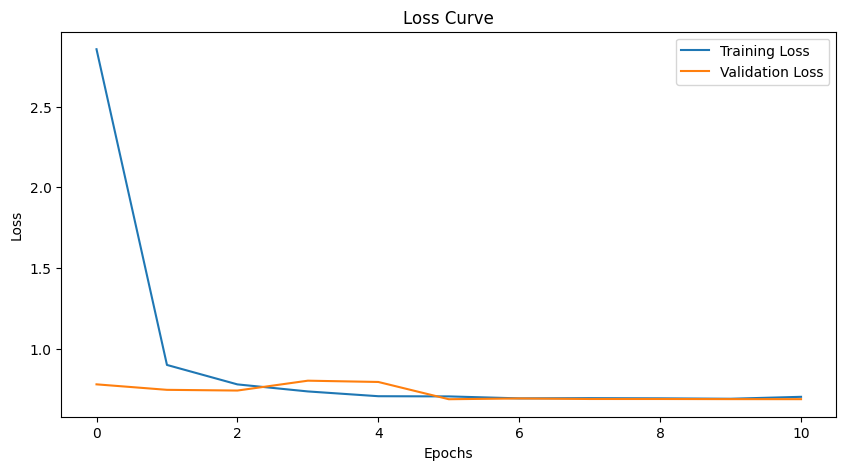

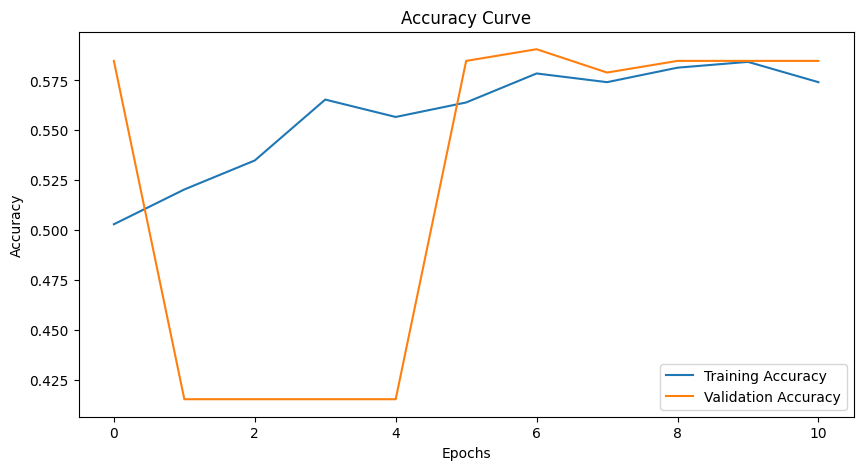

In [ ]:
# # Plot training and validation accuracy
# plt.plot(history.history['accuracy'][0:100], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Training vs Validation Accuracy')
# plt.legend()
# plt.show()

# # Plot training and validation loss
# plt.plot(history.history['loss'][0:100], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training vs Validation Loss')
# plt.legend()
# plt.show()

# Extract the metrics
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']  # Use 'acc' if using older Keras versions
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']  # Use 'val_acc' if using older Keras versions

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# save history

import pickle

# Save the history object
with open('/content/drive/My Drive/Pandoo/Fall 2024/Project/history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [ ]:
# Load the history object after session ends

# with open('/content/drive/My Drive/Pandoo/Fall 2024/Project/history.pkl', 'rb') as file:
#     loaded_history = pickle.load(file)

# # Access the metrics
# training_loss = loaded_history['loss']
# training_accuracy = loaded_history['accuracy']
# validation_loss = loaded_history['val_loss']
# validation_accuracy = loaded_history['val_accuracy']

In [ ]:
# test the model

best_model_file = "/content/drive/My Drive/Pandoo/Fall 2024/Project/Audio-Mijor-Minor.keras"
best_model = tf.keras.models.load_model(best_model_file)

In [ ]:

shape=(97,1025)
# testImg = "/content/drive/My Drive/Pandoo/Fall 2024/Project/Audio_Images/Minor_Images/Minor_14.png"
testImg = "/content/drive/My Drive/Pandoo/Fall 2024/Project/Audio_Images/Major_Images/Major_14.png"
image = cv2.imread(testImg)

In [ ]:
resizedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resizedImage = cv2.resize(resizedImage,shape,interpolation=cv2.INTER_AREA)
# resizedImage = np.expand_dims(resizedImage, axis=-1)

imgResult = img_to_array(resizedImage)
imgResult = np.expand_dims(imgResult, axis=0)
imgResult = imgResult / 255.

In [ ]:
resultArray = best_model.predict(imgResult, verbose=1)
print(resultArray)

answer = resultArray[0][0]

if answer < 0.5:
    print("Major chord")
else :
    print("Minor chord")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[1.0096659e-05]]
Major chord


In [ ]:
# define consistnet shape and batch size.
shape = (1025,97)
batchSize = 32

# imageGenerator = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=0.2,
#     rotation_range=10,
#     width_shift_range=0.05,
#     height_shift_range=0.05,
#     zoom_range=0.1,
#     horizontal_flip=False,
#     fill_mode='nearest'
# )


In [ ]:
# import os
# import shutil
# import random

# # Define paths
# major_images_path = "/content/drive/My Drive/Colab Notebooks/Audio_Files/New/Major_Images"
# minor_images_path = "/content/drive/My Drive/Colab Notebooks/Audio_Files/New/Minor_Images"

# test_major_path = "/content/drive/My Drive/Colab Notebooks/Audio_Files/Test/Major"
# test_minor_path = "/content/drive/My Drive/Colab Notebooks/Audio_Files/Test/Minor"

# # Ensure the Test subdirectories exist
# os.makedirs(test_major_path, exist_ok=True)
# os.makedirs(test_minor_path, exist_ok=True)

# def move_files_randomly(source_dir, dest_dir, test_ratio=0.2):
#     """
#     Moves a random subset of files from the source directory to the destination directory.
#     test_ratio: Proportion of files to move.
#     """
#     if len(os.listdir(dest_dir)) > 0:
#         print(f"Files already exist in {dest_dir}. Skipping move to prevent duplicates.")
#         return

#     # List all image files in the source directory
#     files = [f for f in os.listdir(source_dir) if f.endswith('.png')]
#     random.shuffle(files)  # Shuffle the list to ensure randomness

#     # Calculate the number of files to move
#     num_to_move = int(len(files) * test_ratio)
#     print(f"Moving {num_to_move} files from {source_dir} to {dest_dir}...")

#     # Move the selected files
#     for file in files[:num_to_move]:
#         src_path = os.path.join(source_dir, file)
#         dest_path = os.path.join(dest_dir, file)
#         shutil.move(src_path, dest_path)

#     print(f"Moved {num_to_move} files to {dest_dir}")

# # Move files for Major and Minor spectrograms
# move_files_randomly(major_images_path, test_major_path, test_ratio=0.2)
# move_files_randomly(minor_images_path, test_minor_path, test_ratio=0.2)

In [ ]:
# test_major_path = "/content/drive/My Drive/Colab Notebooks/Audio_Files/Test/Major"
# test_minor_path = "/content/drive/My Drive/Colab Notebooks/Audio_Files/Test/Minor"

# # Count the files in Test/Major and Test/Minor
# test_major_files = len([f for f in os.listdir(test_major_path) if f.endswith('.png')])
# test_minor_files = len([f for f in os.listdir(test_minor_path) if f.endswith('.png')])

# print(f"Files in Test/Major: {test_major_files}")
# print(f"Files in Test/Minor: {test_minor_files}")

In [ ]:
'''
ImageDataGenerator preprocesses and augment images.
rescaling is done to normalize pixel values from [0,1]
batch size is number of training samples (images) that are passed through the model before the model's weights are updated
mini-batch GD: model updates weights after 32 images
688 images / 32 = 22 iterations per epoch
'''

imageGenerator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_dataset = imageGenerator.flow_from_directory(directory = "/content/drive/My Drive/Colab Notebooks/Audio_Files/New/",
                                                   batch_size = batchSize, target_size = shape, subset="training", shuffle= True, color_mode = "grayscale",
                                                   class_mode="binary"
                                                   )

val_dataset = imageGenerator.flow_from_directory(directory = "/content/drive/My Drive/Colab Notebooks/Audio_Files/New/",
                                                   batch_size = batchSize, target_size = shape, subset="validation", shuffle = False, color_mode="grayscale",
                                                   class_mode="binary"
                                                )


Found 688 images belonging to 2 classes.
Found 171 images belonging to 2 classes.


In [ ]:
# Debug counts
print(f"Training samples (via generator): {train_dataset.samples}")
print(f"Validation samples (via generator): {val_dataset.samples}")

# Inspect the class indices
print(f"Class indices (via generator): {train_dataset.class_indices}")

Training samples (via generator): 688
Validation samples (via generator): 171
Class indices (via generator): {'Major_Images': 0, 'Minor_Images': 1}


In [ ]:
print(f"Class indices: {train_dataset.class_indices}")
print(f"Classes in batches: {train_dataset.classes}")
print(f"Number of batches: {len(train_dataset)}")

Class indices: {'Major_Images': 0, 'Minor_Images': 1}
Classes in batches: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1

In [ ]:
import numpy as np

major_count = np.sum(train_dataset.classes == 0)
minor_count = np.sum(train_dataset.classes == 1)

print(f"Number of Major Images: {major_count}")
print(f"Number of Minor Images: {minor_count}")

Number of Major Images: 402
Number of Minor Images: 286


In [ ]:
# test_imageGenerator = ImageDataGenerator(rescale=1./255)

# test_dataset = test_imageGenerator.flow_from_directory(
#     directory="/content/drive/My Drive/Colab Notebooks/Audio_Files/Test/",
#     batch_size=batchSize,
#     target_size=shape,
#     color_mode="grayscale",
#     class_mode="binary",
#     shuffle=False  # Shuffle should be off for test data
# )

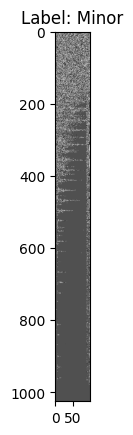

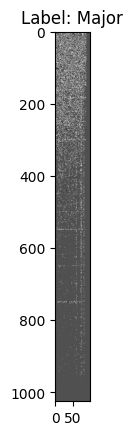

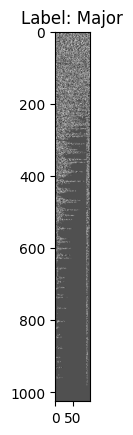

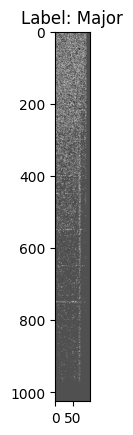

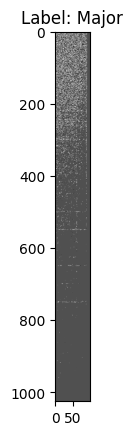

In [ ]:
import matplotlib.pyplot as plt

# Inspect a few samples from the training dataset
for i in range(5):  # Adjust the range as needed
    img, label = train_dataset[0][0][i], train_dataset[0][1][i]
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Label: {'Major' if label == 0 else 'Minor'}")
    plt.show()

In [ ]:
print(f"Number of validation samples: {val_dataset.samples}")
# stepsperepoch = int(np.ceil(train_dataset.samples / batchSize))
# print(stepsperepoch)
# validation_steps = int(np.ceil(val_dataset.samples / batchSize))
# print(validation_steps)

Number of validation samples: 171


In [ ]:
for batch in val_dataset:
    print("Validation batch shape:", batch[0][0].shape)
    break

Validation batch shape: (1025, 97, 1)


In [ ]:
batch1 = train_dataset[0]
# image 5
image5 = batch1[0][5]
label = batch1[1][5]
print(image5.shape)
print(label)

(1025, 97, 1)
0.0


In [ ]:
print(train_dataset.class_indices)
print(val_dataset.class_indices)

{'Major_Images': 0, 'Minor_Images': 1}
{'Major_Images': 0, 'Minor_Images': 1}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.4601 - loss: 167.3095
Epoch 1: val_accuracy improved from -inf to 0.58480, saving model to /content/drive/My Drive/Colab Notebooks/Audio_Files/best_model.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.4622 - loss: 162.8752 - val_accuracy: 0.5848 - val_loss: 0.6863
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.5814 - loss: 0.6846
Epoch 3: val_accuracy did not improve from 0.58480
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 267ms/step - accuracy: 0.5816 - loss: 0.6845 - val_accuracy: 0.5848 - val_loss: 0.6789
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.5599 - loss: 0.6867
Epoch 5: val_accuracy did not improve from 0.58480
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 323ms/step - accuracy: 0.5609 - loss: 0.6864 - val_accuracy: 0.5848 - val_loss: 0.6807


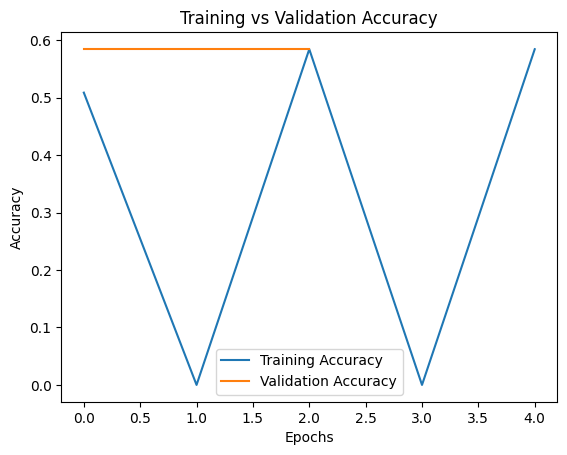

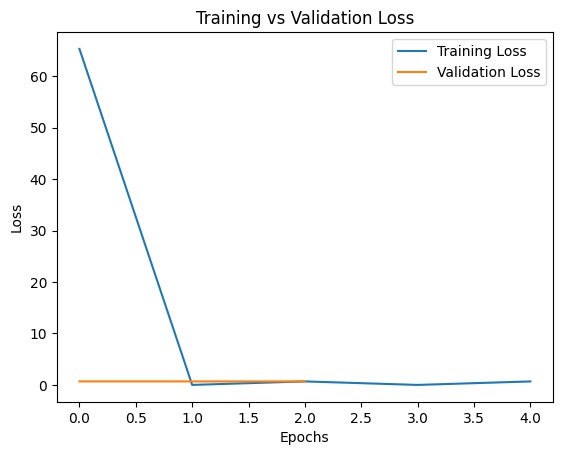

In [ ]:
#model
# Adaptive Moment Estimation
import matplotlib.pyplot as plt

optimizer = keras.optimizers.Adam(learning_rate=.01)
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=[1025, 97, 1]),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),

    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),

    keras.layers.Conv2D(512, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),


    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation = 'relu'),

    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])


model.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])

stepsperepoch = int(np.ceil(train_dataset.samples / batchSize))

validation_steps = int(np.ceil(val_dataset.samples / batchSize))


best_model_path = '/content/drive/My Drive/Colab Notebooks/Audio_Files/best_model.keras'
best_model = ModelCheckpoint(best_model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# early_stopping = EarlyStopping(
#     monitor='val_loss',    # Metric to monitor (e.g., 'val_loss' or 'val_accuracy')
#     patience=3,            # Number of epochs with no improvement after which training will be stopped
#     restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
#     mode='min'             # 'min' for minimizing 'val_loss', 'max' for maximizing 'val_accuracy'
# )

history = model.fit(train_dataset, epochs=5, steps_per_epoch=stepsperepoch, validation_data=val_dataset, validation_steps=validation_steps, callbacks=[best_model])


# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [ ]:
print(f"Training samples: {train_dataset.samples}")
print(f"Validation samples: {val_dataset.samples}")
print(f"Batch size: {batchSize}")
print(f"Steps per epoch: {stepsperepoch}")
print(f"Validation steps: {validation_steps}")
print(f"Number of training batches: {len(train_dataset)}")
print(f"Number of validation batches: {len(val_dataset)}")

Training samples: 688
Validation samples: 171
Batch size: 32
Steps per epoch: 22
Validation steps: 6
Number of training batches: 22
Number of validation batches: 6
{'Major_Images': 0, 'Minor_Images': 1}
{'Major_Images': 0, 'Minor_Images': 1}


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
best_model_path = '/content/drive/My Drive/Colab Notebooks/Audio_Files/best_model.keras'
model = load_model(best_model_path)

# Summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 1023, 95, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 511, 47, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 509, 45, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 254, 22, 128)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 252, 20, 256)        │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 126, 10, 256)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 124, 8, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 62, 4, 512)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 126976)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │     130,024,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,725,893 (1.47 GB)

 Trainable params: 131,575,297 (501.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 263,150,596 (1003.84 MB)

Final training accuracy: 0.0


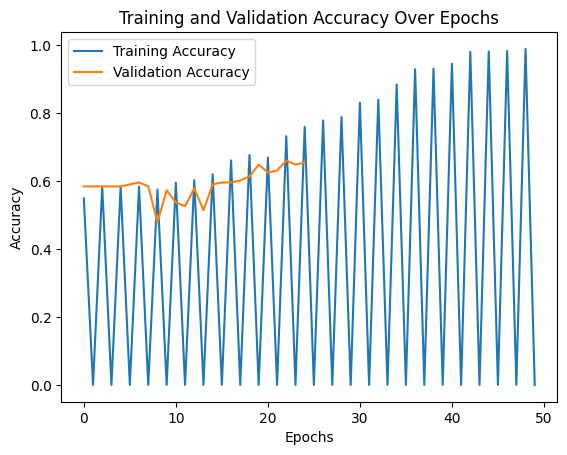

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Print the last epoch's training accuracy
print("Final training accuracy:", train_accuracy[-1])

# Plot the training and validation accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Over Epochs')
plt.show()